In [59]:
import pandas as pd
import spacy
from glob import glob
# import word2vec
# import gensim
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import json
from mpl_toolkits.mplot3d import Axes3D, proj3d
from numpy import dot
from numpy.linalg import norm
%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,8)

In [56]:
nlp = spacy.load('en_core_web_lg')

# Advanced Topics in Word Embeddings

## NYCDH Week, February 2019

Here are some more resources for getting started: 

- [A classic primer on Word Embeddings, from Google (uses TensorFlow)](https://www.tensorflow.org/tutorials/representation/word2vec)
- [Another word2vec tutorial using TensorFlow](https://adventuresinmachinelearning.com/word2vec-tutorial-tensorflow/)
- [The original documentation of word2vec](https://code.google.com/archive/p/word2vec/)
- [Spacy Docs on vector similarity](https://spacy.io/usage/vectors-similarity)
- [Gensim Docs](https://radimrehurek.com/gensim/models/keyedvectors.html)


For getting started in NLP more generally, here are two notebooks of mine: 

- [Introduction to Text Analysis](https://github.com/JonathanReeve/dataviz-workshop-2017)
- [Advanced Text Analysis Workshop](https://github.com/JonathanReeve/advanced-text-analysis-workshop-2017)

## An Example of Document Vectors: Project Gutenberg

![First 30 Books of Project Gutenberg](example-gut.png)

# Word Vector Similarity

In [60]:
africanSwallow = nlp('African swallow')
europeanSwallow = nlp('European swallow')
coconut = nlp('coconut')

In [61]:
africanSwallow.similarity(europeanSwallow)

0.8596378859289445

In [6]:
africanSwallow.similarity(coconut)

0.29012316320087245

In [7]:
def similarity(vecA, vecB):
    return dot(vecA, vecB) / (norm(vecA, ord=2) * norm(vecB, ord=2))

In [8]:
similarity(africanSwallow.vector, europeanSwallow.vector)

0.8596379

In [9]:
swallowArithmetic = (africanSwallow.vector - europeanSwallow.vector)

In [11]:
def mostSimilar(vec):
    highestSimilarities = [0]
    highestWords = [""]
    for w in nlp.vocab:
        sim = similarity(vec, w.vector)
        if sim > highestSimilarities[-1]:
            highestSimilarities.append(sim)
            highestWords.append(w.text.lower())
    return list(zip(highestWords, highestSimilarities))[-10:]

# Analogies (Linear Algebra)

In [62]:
sql = nlp('sql')
mostSimilar(sql.vector)

[('', 0), ('truth', 0.06349843), ('want', 0.18007132)]

In [63]:
data = nlp('data')
mostSimilar(data.vector)

[('', 0),
 ('truth', 0.19171838),
 ('want', 0.25615644),
 ('property', 0.2976224),
 ('one', 0.31229097)]

In [65]:
data = nlp('science')
mostSimilar(data.vector)

[('', 0), ('truth', 0.44312733)]

In [12]:
mostSimilar(swallowArithmetic)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


[('croup', 0.06349667),
 ('deceased', 0.11223719),
 ('jambalaya', 0.14376067),
 ('cobra', 0.17929555),
 ('addax', 0.18801448),
 ('tanzania', 0.25093195),
 ('rhinos', 0.3014531),
 ('lioness', 0.34080425),
 ('giraffe', 0.37119302),
 ('african', 0.5032688)]

In [13]:
mostSimilar(coconut.vector)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


[('jambalaya', 0.24809696),
 ('tawny', 0.25790486),
 ('concentrate', 0.35225457),
 ('lasagna', 0.36302274),
 ('puddings', 0.4095627),
 ('peel', 0.47492552),
 ('eucalyptus', 0.48999348),
 ('carob', 0.5774758),
 ('peanut', 0.6609558),
 ('coconut', 1.0000001)]

In [14]:
king, queen, woman, man = [nlp(w).vector for w in ['king', 'queen', 'woman', 'man']]

In [15]:
answer = king - man + woman

In [16]:
mostSimilar(answer)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


[('gorey', 0.034739517),
 ('deceased', 0.2673984),
 ('peasant', 0.3268029),
 ('guardian', 0.32859263),
 ('comforter', 0.346274),
 ('virgins', 0.35614407),
 ('kissing', 0.3649173),
 ('woman', 0.51508135),
 ('kingdom', 0.55209816),
 ('king', 0.8024261)]

In [17]:
paris, france, germany = [nlp(w).vector for w in ['Paris', 'France', 'Germany']]
answer = paris - france + germany
mostSimilar(answer)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


[('orlando', 0.48517892),
 ('dresden', 0.5117479),
 ('warsaw', 0.56286174),
 ('stuttgart', 0.5869507),
 ('vienna', 0.60860515),
 ('prague', 0.62894964),
 ('munich', 0.66777843),
 ('paris', 0.6961338),
 ('berlin', 0.75474036),
 ('germany', 0.8027712)]

# Pride and Prejudice

In [18]:
pride = open('pride.txt').read()

In [19]:
prideDoc = nlp(pride)

In [20]:
prideNouns = [w for w in prideDoc if w.pos_.startswith('N')][:40]
prideNounLabels = [w.lemma_ for w in prideNouns]

In [21]:
prideNounVecs = [w.vector for w in prideNouns]

In [22]:
reduced = PCA(n_components=3).fit_transform(prideNounVecs)

In [23]:
prideDF = pd.DataFrame(reduced)

In [24]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,8)

def plotResults3D(df, labels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(labels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

<IPython.core.display.Javascript object>


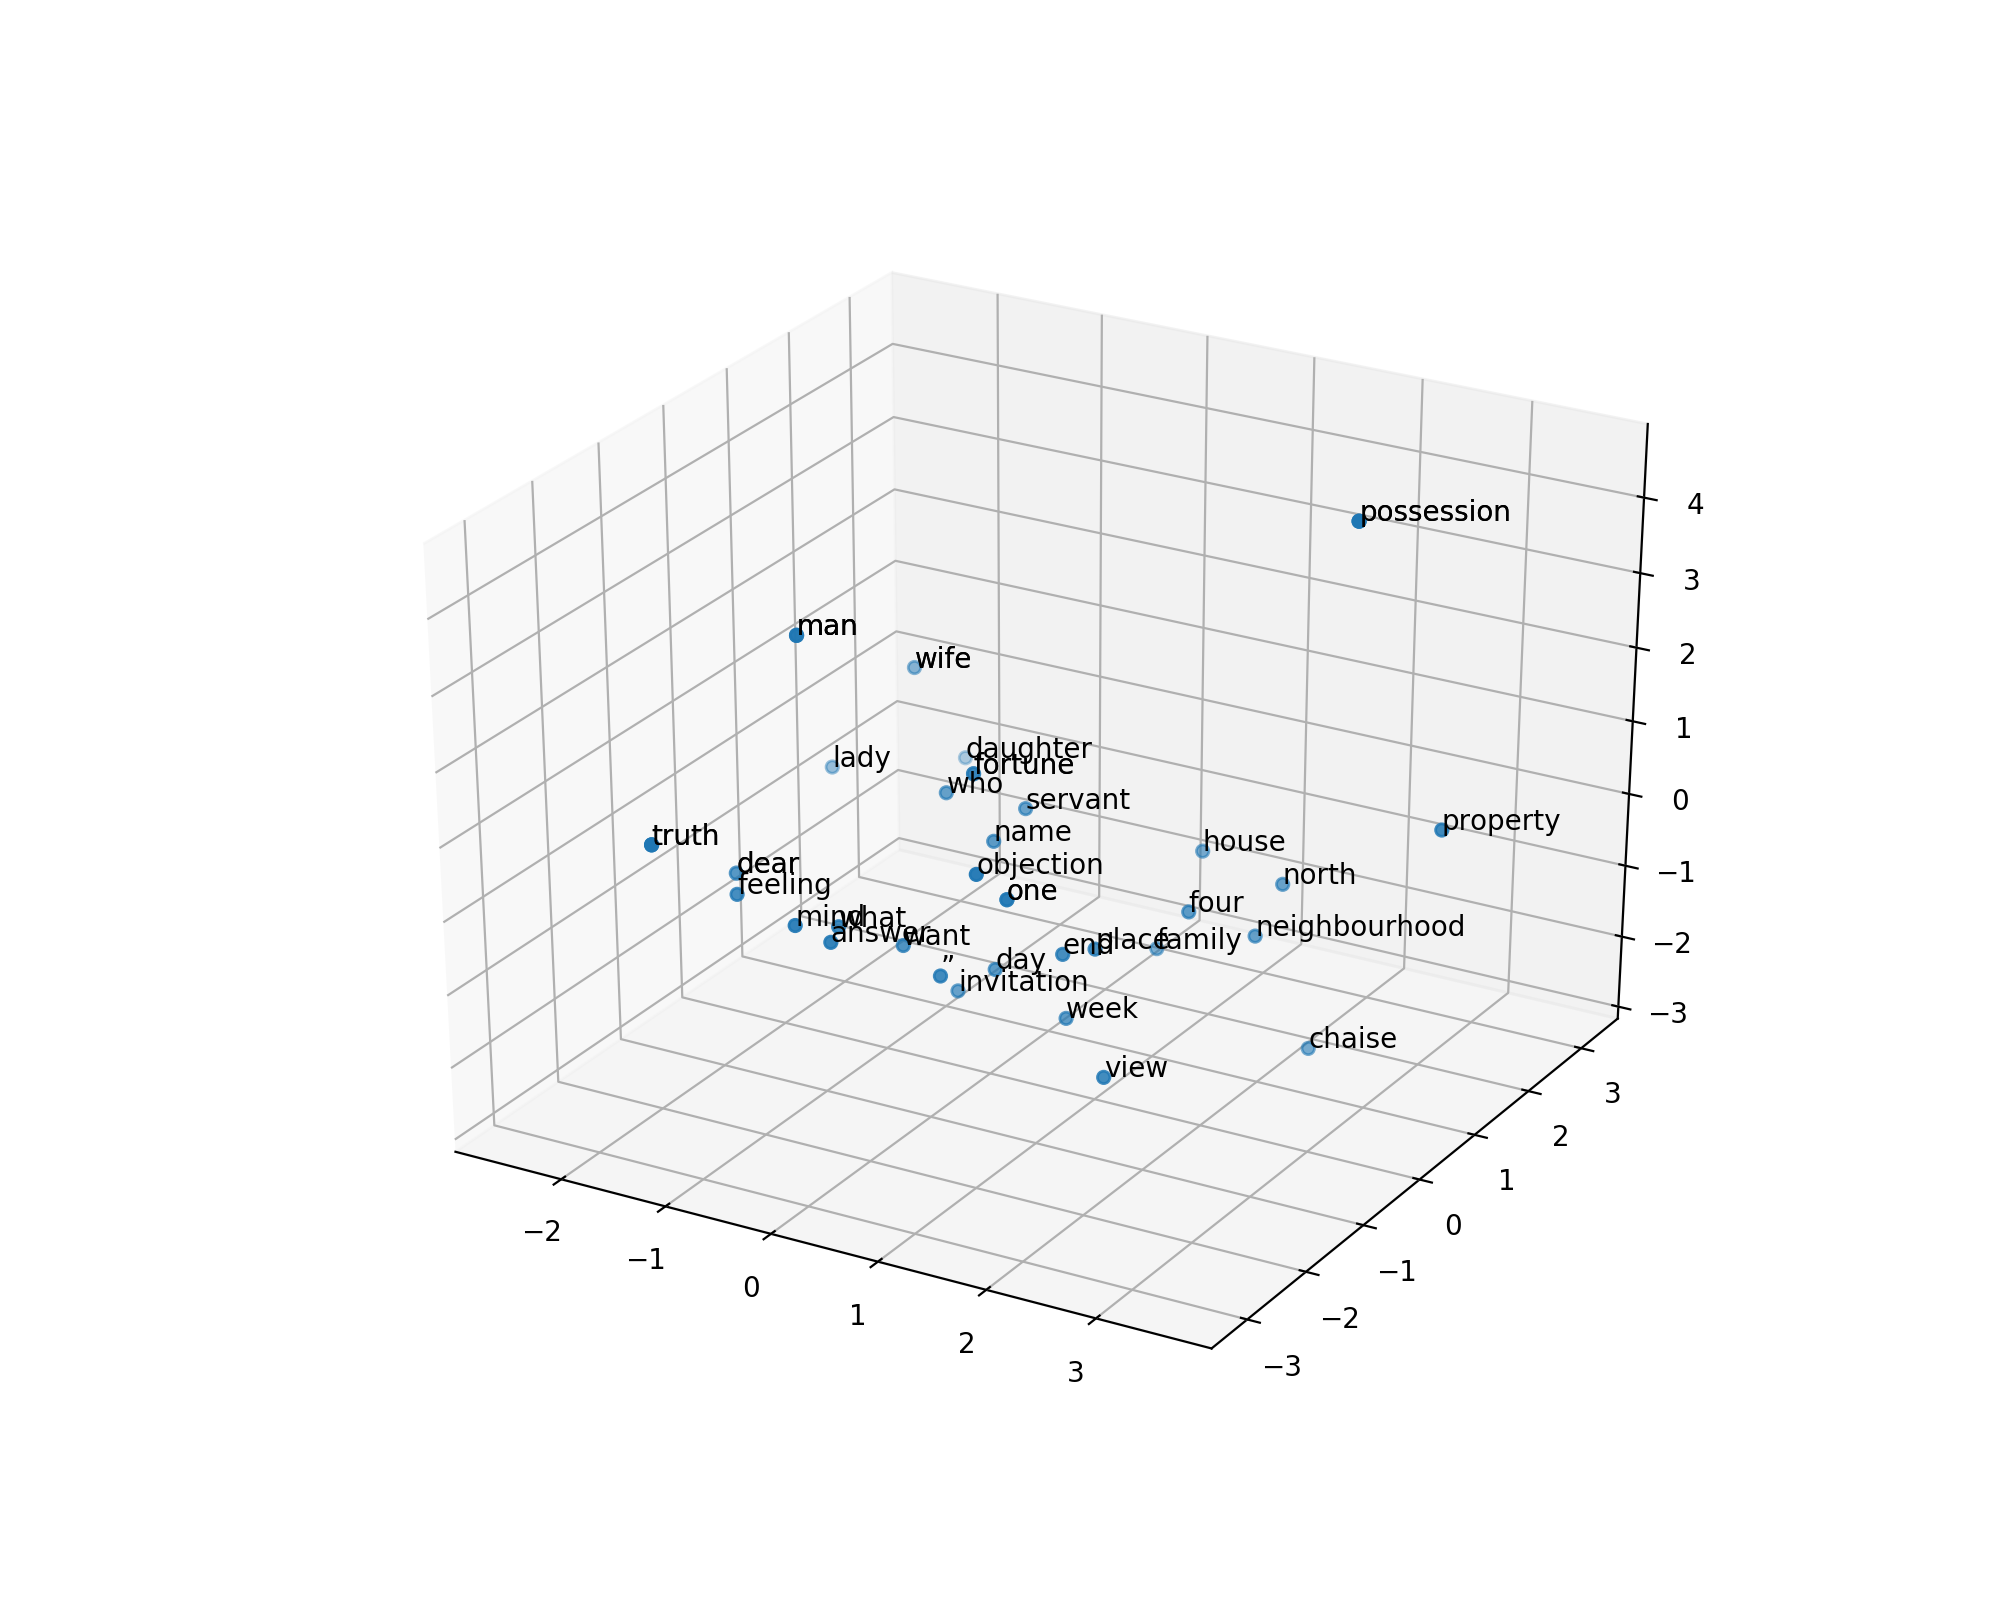

In [25]:
plotResults3D(prideDF, prideNounLabels)

In [26]:
# Redo this function with only nouns from Pride and Prejudice
def mostSimilar(vec):
    highestSimilarities = [0]
    highestWords = [""]
    for w in prideNouns:
        sim = similarity(vec, w.vector)
        if sim > highestSimilarities[-1]:
            highestSimilarities.append(sim)
            highestWords.append(w.text.lower())
    return list(zip(highestWords, highestSimilarities))[-10:]

In [27]:
mostSimilar(nlp('wife').vector)

[('', 0), ('truth', 0.3113211), ('man', 0.5086593), ('wife', 1.0)]

# Senses

In [28]:
senseDocs = [nlp(w) for w in ['sound', 'sight', 'touch', 'smell']]
def whichSense(word):
    doc = nlp(word)
    return {sense: doc.similarity(sense) for sense in senseDocs}


In [29]:
whichSense('symphony')

{sound: 0.37716483832358116,
 sight: 0.20594012171222334,
 touch: 0.19551651130481998,
 smell: 0.1985263912275575}

In [30]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,8)

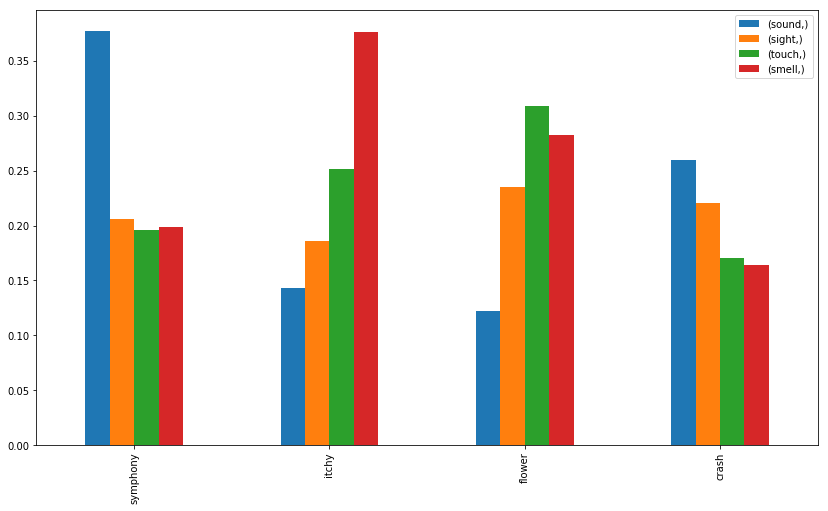

In [31]:
testWords = 'symphony itchy flower crash'.split()
pd.DataFrame([whichSense(w) for w in testWords], index=testWords).plot(kind='bar')

# The Inaugural Address Corpus

In [32]:
inauguralFilenames = sorted(glob('inaugural/*'))
inauguralLabels = [fn[10:-4] for fn in inauguralFilenames]
inauguralDates = [int(label[:4]) for label in inauguralLabels]
parties = 'rrrbbrrrbbbbbrrbbrrbrrrbbrrbr' # I did this manually. There are probably errors.
inauguralRaw = [open(f, errors="ignore").read() for f in inauguralFilenames]

In [33]:
# Sanity check: peek
for i in range(4): 
    print(inauguralLabels[i][:30], inauguralDates[i], inauguralRaw[i][:30])

1901-McKinley 1901 My fellow-citizens, when we as
1905-Roosevelt 1905 My fellow citizens, no people 
1909-Taft 1909 My fellow citizens: Anyone who
1913-Wilson 1913 There has been a change of gov


In [34]:
inauguralDocs = [nlp(text) for text in inauguralRaw]

In [35]:
inauguralVecs = [doc.vector for doc in inauguralDocs]

In [36]:
# Compute a similarity matrix.
# Check the similarity of everything against everything else. 
# Note: this is not very efficient. 
similarities = []
for vec in inauguralDocs: 
    thisSimilarities = [vec.similarity(other) for other in inauguralDocs]
    similarities.append(thisSimilarities)

In [37]:
df = pd.DataFrame(similarities, columns=inauguralLabels, index=inauguralLabels)

In [38]:
df[df < 1].idxmax()

1901-McKinley        1925-Coolidge
1905-Roosevelt         1913-Wilson
1909-Taft            1901-McKinley
1913-Wilson         1905-Roosevelt
1917-Wilson         1905-Roosevelt
1921-Harding       1953-Eisenhower
1925-Coolidge       1933-Roosevelt
1929-Hoover          1901-McKinley
1933-Roosevelt       1925-Coolidge
1937-Roosevelt      1933-Roosevelt
1941-Roosevelt      1937-Roosevelt
1945-Roosevelt        1965-Johnson
1949-Truman           1921-Harding
1953-Eisenhower    1957-Eisenhower
1957-Eisenhower    1953-Eisenhower
1961-Kennedy            2009-Obama
1965-Johnson            1969-Nixon
1969-Nixon            1965-Johnson
1973-Nixon             1981-Reagan
1977-Carter             2009-Obama
1981-Reagan            1985-Reagan
1985-Reagan            1981-Reagan
1989-Bush             1965-Johnson
1993-Clinton            2017-Trump
1997-Clinton           1985-Reagan
2001-Bush              1981-Reagan
2005-Bush          1953-Eisenhower
2009-Obama             1981-Reagan
2017-Trump          

In [39]:
embedded = PCA(n_components=2).fit_transform(inauguralVecs)

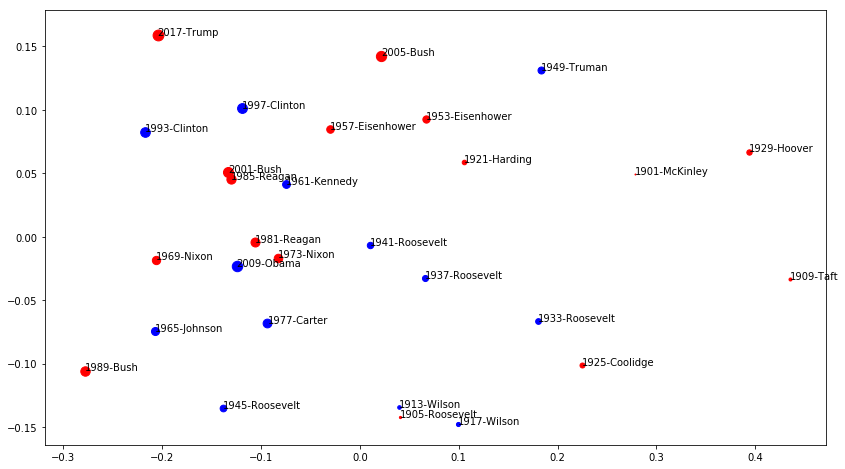

In [40]:
xs, ys = embedded[:,0], embedded[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i], c=parties[i], s=inauguralDates[i]-1900)
    plt.annotate(inauguralLabels[i], (xs[i], ys[i]))

# Detective Novels

In [42]:
detectiveJSON = open('detectives.json')
detectivesData = json.load(detectiveJSON)
detectivesData = detectivesData[1:] # Chop of #1, which is actually a duplicate

In [43]:
detectiveTexts = [book['text'] for book in detectivesData]

In [44]:
detectiveLengths = [len(text) for text in detectiveTexts] # How long are they? We might want to cut them down
detectiveLengths

[351240, 415961, 440629, 611531, 399572, 242949, 648486, 350142, 288955]

In [45]:
detectiveTextsTruncated = [t[:min(detectiveLengths)] for t in detectiveTexts]

In [46]:
detectiveDocs = [nlp(book) for book in detectiveTextsTruncated] # This should take a while

In [47]:
extraWords = "gun knife snake diamond".split()
extraDocs = [nlp(word) for word in extraWords]
extraVecs = [doc.vector for doc in extraDocs]

In [48]:
detectiveVecs = [doc.vector for doc in detectiveDocs]
detectiveLabels = [doc['author'].split(',')[0] +  '-' + doc['title'][:20] for doc in detectivesData]

In [49]:
detectiveLabels

['Collins-The Haunted Hotel: A',
 'Rohmer-The Insidious Dr. Fu',
 'Chesterton-The Innocence of Fat',
 'Doyle-The Return of Sherlo',
 'Chesterton-The Wisdom of Father',
 'Doyle-A Study in Scarlet',
 "Gaboriau-The Count's Millions",
 "Rinehart-Where There's a Will",
 "Michelson-In the Bishop's Carr"]

In [50]:
pcaOut = PCA(n_components=10).fit_transform(detectiveVecs + extraVecs)
tsneOut = TSNE(n_components=2).fit_transform(pcaOut)

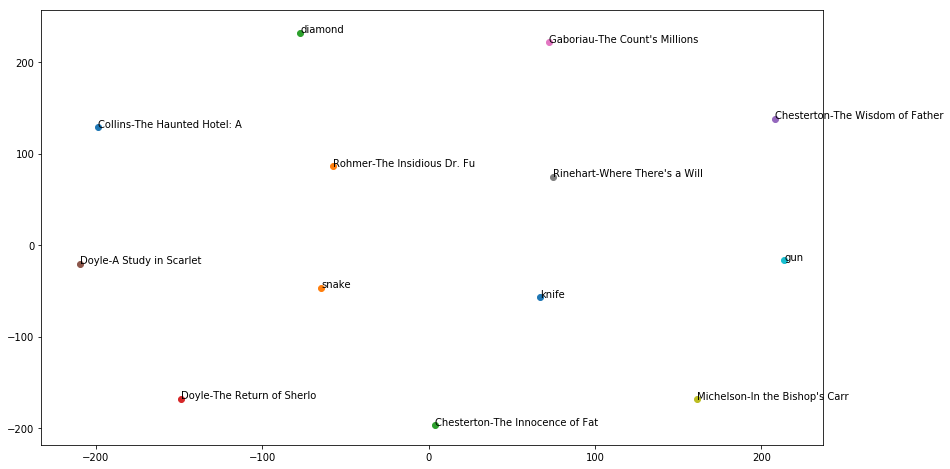

In [51]:
xs, ys = tsneOut[:,0], tsneOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate((detectiveLabels + extraWords)[i], (xs[i], ys[i]))

In [52]:
# Sanity check
counts = {label: {w: 0 for w in extraWords} for label in detectiveLabels}
for i, doc in enumerate(detectiveDocs):
    for w in doc: 
        if w.lemma_ in extraWords: 
            counts[detectiveLabels[i]][w.lemma_] += 1

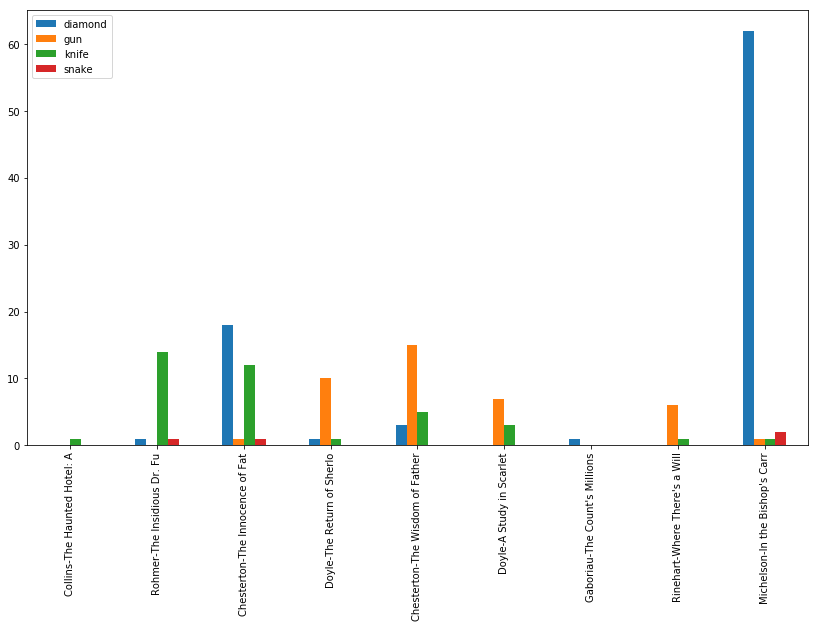

In [53]:
pd.DataFrame(counts).T.plot(kind='bar')

# Train Your Own

In [ ]:
# Requires Gensim. See commented-out imports above.
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

In [ ]:
word_vectors = model.wv

In [ ]:
[w for w in dir(word_vectors) if not w.startswith('_')]